In [63]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

## Jump Diffusion Processes
Extend the Black-Scholes model by independentt jumps, driven by a Poisson Processes. Considering $X(t)=logS(t)$, under the real-world measure $\mathbb{P}$,
$$dX(t) = udt + odW^\mathbb{P}(t) + JdX_{\mathbf{P}}((t))$$

where $u$ is the drift, \sigma is the volatility, $X_{\mathbf{P}}$ is a Poisson process and $J$ gives the jump magnitude, driven by a chosen distribution, $F_j$, of magnitudes.
$W^\mathbb{P}(t)$ and $X_{\mathbf{P}}(t)$ are assumed to be indipendent

# Definition: Poisson random variable
$X_{\mathbf{P}}(t)$ counts the number of occurences of an event during a given time period. The Probability of observing $k\geq 0$ occurences in a time period:
- $$ P[X_{\mathbf{P}} = k] = \frac{\xi_p^k e^{-\xi{_p}}}{k!}$$
- $$ \mathbb{E}[X_{\mathbf{P}}]= \xi{_p}$$
- $$\mathbb{V}ar(X_{\mathbf{P}}) = \xi_{p}$$

## Definition: Poisson Process
- $X_{\mathbf{P}}(0)$ = 0$
- $\forall t$, $ X_{\mathbf{P}}(t_n) - X_{\mathbf{P}}(t_n-1)$ are independent random variables (independent increments)
- Increments have a Poisson distribution:
$$  P[X_{\mathbf{P}(s+t)} - X_{\mathbf{P}(s)} = k] = \frac{(\xi_p^kt) e^{-\xi{_p}t}}{k!}$$
for $0<s<t$ and $k\geq0$
$X_{\mathbf{P}}(t)$ is a counting process: a process counting the number of jumps in a time period of length t.

## Details
The probability that exactly one event occurs in small time period $dt$:
- $P[X_{\mathbf{P}(s+dt)} - X_{\mathbf{P}(s)} = 1] = \frac{(\xi_pdt) e^{-\xi{_p}dt}}{1!}$ = $\xi_pdt + \omicron(dt)$ <br> <br>
and the probability that no event occurs id $dt$ is: 
- $P[X_{\mathbf{P}(s+dt)} - X_{\mathbf{P}(s)} = 0] = e^{-\xi{_p}dt}=1 - \xi_pdt + \omicron(dt)$

In $dt$, a jump will arrive with probability $\xi_pdt$:
- $$ \mathbb{E}[dX_{\mathbf{P}}]= \xi{_p}dt = 1 \cdot \xi_pdt + 0 \cdot e^{-\xi{_p}dt}$$


## Requirement
The Brownian motion increments have a nice property: the Expected value is 0.
The expected value of the increment of a Poisson process $ \mathbb{E}[dX_{\mathbf{P}}]$ is not 0.
- We define the compensated Poisson Process $\bar{X}_{\mathbf{P}}$=$X_{\mathbf{P}} - \xi{_p}dt$, which is a martingale
- so that $\mathbb{E}[d\bar{X}_{\mathbf{P}}]= 0$

Given the following SDE:
$$ dX(t)= J(t)dX_{\mathbf{P}}(t)$$
we may define the stochastic integral with respect to the Poisson process $X_{\mathbf{P}}$, by:
$$ X(T) - X(t_0) = \int_{t_0}^{T} J(t)dX_{\mathbf{P}}(t) \coloneqq  \sum_{k=1}^{X_{\mathbf{P}(T)}}J_k$$

$J_k$ for $k \geq 1$ is an i.i.d. sequence of random variables with a jump size probability distribution $F_J$, so that $\mathbb{E}[J_k]=u_j<\infty$

## Code using a for loop

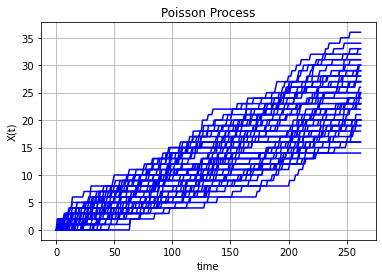

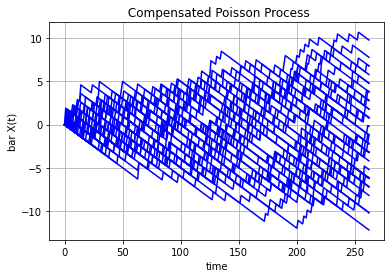

In [64]:
def GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,xiP,seed=123): 
    """
    NoOfPaths (integer): The number of simulations
    NoOfSteps (integer): The number of steps in a single path
    T         (integer): The end period of the simulation
    xiP       (integer): Average number of occurences in a a single period
    """
    # Create empty matrices for Poisson process and for compensated Poisson process
    np.random.seed(seed)
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    Xc = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
                
    dt = T / float(NoOfSteps)
    
    Z = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        X[:,i+1]  = X[:,i] + Z[:,i]
        Xc[:,i+1] = Xc[:,i] -xiP*dt + Z[:,i]
        time[i+1] = time[i] +dt
        
    paths = {"time":time,"X":X,"Xcomp":Xc}
    return paths

def mainCalculation():
    NoOfPaths = 50
    NoOfSteps = 262
    T = 262
    xiP= 0.1
        
    Paths = GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,xiP)
    timeGrid = Paths["time"]
    X = Paths["X"]
    Xc = Paths["Xcomp"]
       
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    plt.title("Poisson Process")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(Xc),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("bar X(t)")
    plt.title(" Compensated Poisson Process")                  
mainCalculation()

## Code using vectorization and datetime index

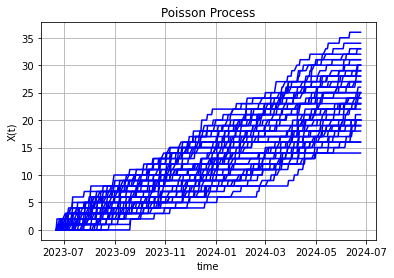

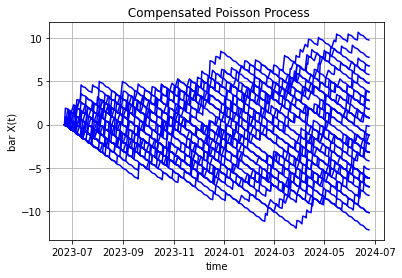

In [65]:
def GeneratePathsPoisson(NoOfPaths,Start_date,End_date,xiP,seed=123):
    """
    NoOfPaths (integer): The number of simulations
    Start_date (string): start date for the simulation
    End_date  (string): The end date of the simulation
    xiP       (integer): Average number of occurences in a a single period
    """ 
    # Create empty matrices for Poisson process and for compensated Poisson process
    np.random.seed(seed)
    start_simulation_date=datetime.strptime(Start_date,"%Y-%m-%d")
    end_simulation_date=datetime.strptime(End_date,"%Y-%m-%d")
    date_range=pd.bdate_range(start_simulation_date,end_simulation_date+pd.tseries.offsets.BDay(1),freq="B")
    time =np.arange(1,len(date_range))
    X = np.zeros([NoOfPaths,len(time)+1])
    Xc = np.zeros([NoOfPaths, len(time)+1])
    dt=1 #by default
    Z = np.random.poisson(xiP*dt,[NoOfPaths,len(time)])
    # making sure that samples from normal have mean 0 and variance 1
    X[:,1:]= Z.cumsum(axis=1)
    Xc[:,1:] =  Z.cumsum(axis=1) - xiP *time
    paths = {"time":date_range,"X":X,"Xcomp":Xc}
    return paths

def mainCalculation():
    NoOfPaths = 50
    Start_date=datetime.strftime((datetime.today() - relativedelta(years=1)),format="%Y-%m-%d")
    End_date= datetime.strftime((datetime.today()),format="%Y-%m-%d")
    xiP= 0.1
    Paths = GeneratePathsPoisson(NoOfPaths,Start_date,End_date,xiP)
    timeGrid = Paths["time"]
    X = Paths["X"]
    Xc = Paths["Xcomp"]
       
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    plt.title("Poisson Process")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(Xc),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("bar X(t)")
    plt.title(" Compensated Poisson Process")                  
mainCalculation()